<a href="https://colab.research.google.com/github/HWANG-HOE-SUN/Handson/blob/master/MlStudy04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <4장 모델훈련>
# 4-1. 선형회귀

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 예측할 회귀관련 변수(X,y)생성
X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1) # 원래함수 y=4+3x +잡음

In [3]:
# 정규방정식을 이용한 선형회귀
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best #예측식 y^ = Theta(1) + Theta(2)x 

array([[3.77912094],
       [3.19506319]])

In [5]:
X_new = np.array([[0],[2]]) # X의 범위가 0~2까지므로 이렇게 행렬 만들었다. 그래야 직선이 (0,?) -> (2,?)이렇게 쫙 그어질테니까
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.77912094],
       [10.16924733]])

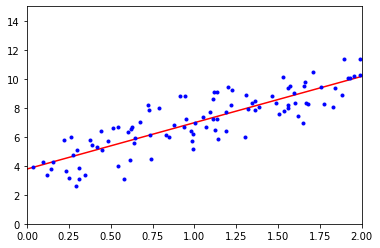

In [6]:
plt.plot(X_new, y_predict, "r-") # X_new의값 0일때 y_predict 3.7 // X_new의값 2일때 y_predict 9.84 두점을 일직선으로 잇는다
plt.plot(X,y,"b.") #X전체 data에대해 y값으로 그린다.(실제값임)
plt.axis([0,2,0,15]) # X축범위 0~2 y축범위 0~15
plt.show()

In [7]:
#이번엔 실제 모델을 임포트해서 써보겠다.(코딩적으로)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_) #절편, 기울기
lin_reg.predict(X_new)

[3.77912094] [[3.19506319]]


array([[ 3.77912094],
       [10.16924733]])

In [8]:
# 내부에서 LinearRegression클래스는 이렇게 돌아감(scipy.linalg.lstsq() )사용해서.
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b,y, rcond=1e-6) 
theta_best_svd # theta^를 계산함.

array([[3.77912094],
       [3.19506319]])

In [9]:
np.linalg.pinv(X_b).dot(y) #유사역행렬을 구하는식(그게 뭔진 모르겠음) 특잇값분해(SVD)를통해 구했다고 한다.

array([[3.77912094],
       [3.19506319]])

# 4-2. 경사하강법 (내용정리)

모델 훈련은 결국 (훈련세트에서) 비용 함수를 최소화하는 모델 파라밑머의 조합을 찾는 일.(파라미터 공간에서)
*그라디언트 = 비용함수의 미분값(이게 0일때 최소점이니, 기울기 가파른 지점으로 가도록 경사하강법 시행)
Idea- 각 파라미터 Oj (theta)에 대해 그라디언트 얼마나 변하는가? 확인
-> 즉, 편도함수를 확인한다. (Oj에 대하여 그라디언트 값 계산. 즉 편미분값)
경사하강법 스텝함수

0n = 0n-1 - n*ㅅMSE(0) // 밑으로 볼록한 함수에 대해.. 손실함수그라디언트(ㅅ)값이 양수면.(즉, 증가해서 최적점에서 멀어지는 값이면) 좌측(감소하는 방향)으로 이동시키려고 -부호가 있는거임. 기울기 음수면 반대로 우측으로 가서 더 밈으로 가게됨. n=학습률.


#4.2.1 배치 경사 하강법
배치 이므로, 훈련Data 전체를 매번 사용해서 학습한다. (So,큰 훈련세트에서 느림)
단, 특성수에 민감하지 않다고 한다.(수십만개 특성? 정규방정식orSVD보다 빠름)
※ Step Size = 학습률

In [10]:
# 경사하강법을 통한 선형회귀
eta = 0.1 # eta=학습률
n_iterations = 1000 # 에포크, 1000번 반복.
m = 100 # 샘플갯수
theta = np.random.randn(2,1)#임의의 점(Theta)설정

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients #그라디언츠가 반복되서 나옴. 즉, 반복문 돌때마다 theta값이 바뀐다.(gradient 부호에 따라 경사하강하도록)

In [11]:
gradients

array([[-7.95097321e-13],
       [ 6.68061162e-13]])

In [12]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

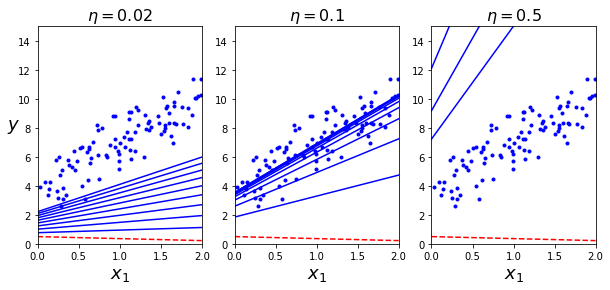

In [13]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

#학습률에 따른 경사하강법 결과 플롯 (넘 낮은경우 -> 넘 큰경우)
plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.savefig("gradient_descent_plot")
plt.show()

# 4.2.2 확률적 경사 하강법
- 하나의 샘플을 임의로 추출해서 그라디언트 계산

In [14]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

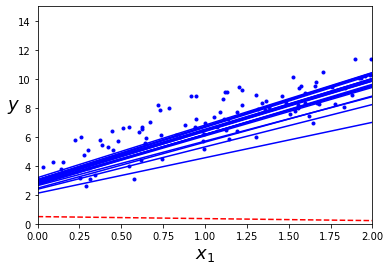

In [15]:
n_epochs = 50 # 50번의 반복만으로 위의 학습률0.1로 1000번 배치학습한 결과와 거의 유사하다.
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터 learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # 책에는 빠짐
            y_predict = X_new_b.dot(theta)           # 책에는 빠짐
            style = "b-" if i > 0 else "r--"         # 책에는 빠짐
            plt.plot(X_new, y_predict, style)        # 책에는 빠짐
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # 책에는 빠짐

plt.plot(X, y, "b.")                                 # 책에는 빠짐
plt.xlabel("$x_1$", fontsize=18)                     # 책에는 빠짐
plt.ylabel("$y$", rotation=0, fontsize=18)           # 책에는 빠짐
plt.axis([0, 2, 0, 15])                              # 책에는 빠짐
plt.savefig("sgd_plot")                                 # 책에는 빠짐
plt.show()                                           # 책에는 빠짐

In [16]:
from sklearn.linear_model import SGDRegressor # 
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_ #다른 방법(정규방정식)결과값과 비슷. 실제 정답(4,3)과도 유사.

(array([3.73981686]), array([3.22327513]))

# 4.2.3 미니배치 경사 하강법
4.2.1과 4.2.2의 중간단계
한샘플 < 미니배치 < 배치 의 느낌.
학습스케줄을 적당히 설정해준다면 최적값 도달 가능,

In [18]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 무작위 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [19]:
theta

array([[3.82121247],
       [3.23212923]])

In [20]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

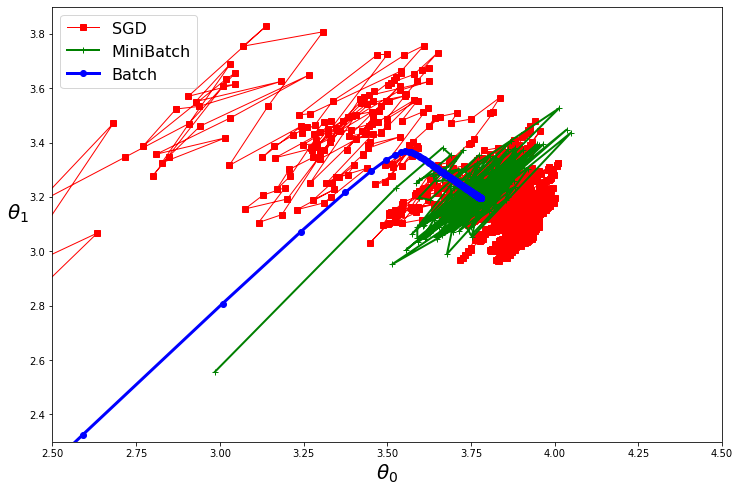

In [21]:
plt.figure(figsize=(12,8))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="SGD")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="MiniBatch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.savefig("gradient_descent_paths_plot")
plt.show()

# 4.3 다항 회귀

In [49]:
# 다항회귀 변수 생성 
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1) # 0.5x^2 + x + 2 + a(a는 난수잡음 X만으로 예측이 힘들게 만듬) # 2차방정식의 비선형 데이터
X,y 

(array([[ 0.73734285],
        [-2.48791521],
        [-2.68990967],
        [ 0.18812779],
        [ 0.24381073],
        [ 0.82457941],
        [ 1.356548  ],
        [ 2.85511248],
        [ 0.09780209],
        [-1.06226116],
        [ 1.77111717],
        [-1.37500649],
        [-0.36617148],
        [-2.52926171],
        [-2.84789554],
        [ 2.77589049],
        [ 2.01588072],
        [ 1.17584524],
        [-0.54628233],
        [-1.96023408],
        [-2.06137774],
        [-1.49854261],
        [ 0.29535999],
        [ 1.28757554],
        [ 0.96118426],
        [-1.32039662],
        [ 2.72919168],
        [ 1.4273815 ],
        [ 0.32612432],
        [ 0.67032448],
        [-0.48239963],
        [-1.51361406],
        [-0.86416393],
        [ 1.54707666],
        [-2.91363907],
        [-2.30356416],
        [-2.72398415],
        [-2.75562719],
        [ 2.1327635 ],
        [ 1.22194716],
        [-0.15495703],
        [-2.41299504],
        [-0.05030475],
        [-0

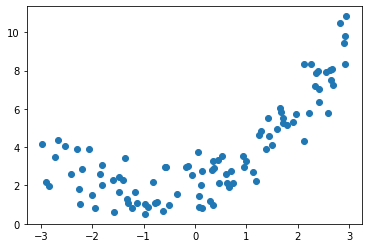

In [23]:
plt.scatter(X,y)

In [50]:
from sklearn.preprocessing import PolynomialFeatures  
poly_features = PolynomialFeatures(degree=2, include_bias = False) # 입력으로 열벡터or행벡터만 가짐.(So,배열을 reshape 해주자. -1,1) 행으로하면 보기 안좋음
X_poly = poly_features.fit_transform(X) 
X[0], X_poly[0] # X는 원래 입력변수. X_poly는 원래변수와 변환된변수(for2차, 다항회귀) 둘 다 포함

(array([0.73734285]), array([0.73734285, 0.54367449]))

★ PolynomialFeatures 관련 설명 밑을 참고(여러함수정리)

In [25]:
X_poly[0] # 원래X값 과 X2차식(x의제곱)값. 이 두가지를 통해 y1, y2 두 예측값 얻을거임(y값중 왼쪽은 1차계수, 오른쪽은 2차계수 예측)  

array([2.38942838, 5.709368  ])

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_ # 0.44x^2 + 1.07x + 2.15라고 예측했음.(식을)

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

In [51]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1) #reshape을통해 행벡터를 100x1열벡터로 바꿨음,
X_new_poly = poly_features.transform(X_new) #점 하나하나를 poly전처리 과정 거쳐야 되기에. 위의 과정처럼 0,2 범위 하나씩 뽑아서하면 안된다.
y_new = lin_reg.predict(X_new_poly) 
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="prediction")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.savefig("quadratic_predictions_plot")
plt.show()

ValueError: ignored

# 실험해보기. ( 만약 위 변수를 선형회귀에 곧바로 넣으면 어떻게 예측할까)

In [28]:
# 위 4장 앞에서 한것과 같은 과정
X_b = np.c_[np.ones((100,1)),X] 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # 정규방정식으로 계산한 Theta

In [29]:
X_new = np.array([[0],[3]]) #.
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best) # 
y_predict

array([[3.51097771],
       [6.76555819]])

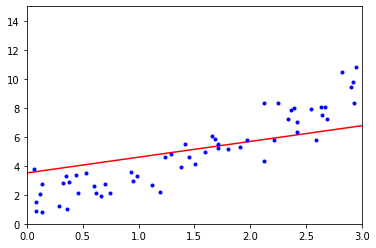

In [30]:
plt.plot(X_new, y_predict, "r-") 
plt.plot(X,y,"b.") 
plt.axis([0,3,0,15]) # X축범위 0~3, y축 범위 0~13정도? (표준정규분포의 일반적 최대치..정도로)
plt.show() # 제대로 비선형관계를 못나타냄. (곡선을 그려줘야하는게 우리의 의도!)

# 차수에 따른 성능(회귀식을 어떻게 그려낼까?) 비교. 너무 높으면 매~우 과대적합

밑의 코드들은 난도가 제법 있으니. 복습잘할것 ( 파이프라인 만들고, 함수 정의하고)

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
std_scaler = StandardScaler()

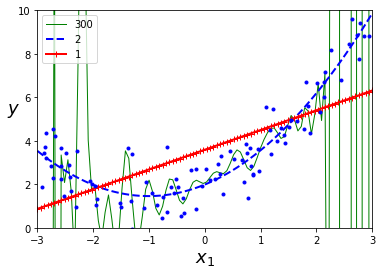

In [52]:
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.savefig("high_degree_polynomials_plot")
plt.show()

# ★4.4 학습곡선(과대적합,과소적합 판단을 돕는다)

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y): 
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10) #test는0.2므로 100개중 20개, train은 80개
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)): #훈련세트크기 1개~샘플수만큼(len) 까지.
        model.fit(X_train[:m], y_train[:m]) #샘플크기 집합별로 모델훈련
        y_train_predict = model.predict(X_train[:m]) 
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict)) #훈련세트 하나의 error
        val_errors.append(mean_squared_error(y_val, y_val_predict)) #교차검증set의 error

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation")
    plt.legend(loc="upper right", fontsize=14)   # 책에는 빠짐
    plt.xlabel("Train Set Size", fontsize=14)       # 책에는 빠짐
    plt.ylabel("RMSE", fontsize=14)              # 책에는 빠짐

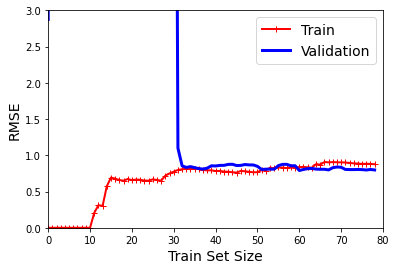

In [54]:
# 10차 다항 회귀 모델의 학습곡선
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y) #X전체data크기는 100개 
plt.axis([0, 80, 0, 3])           # 책에는 빠짐
plt.savefig("learning_curves_plot")  # 책에는 빠짐
plt.show()                        # 책에는 빠짐

# Train set과 Vali set이 멀다. 즉, train set에 과대적합 되어있고 샘플수 늘릴수록 두 곡선 거리 가까워 질것이다.'

# 4.5 규제가 있는 선형 모델

1. 릿지 회귀 (모델 파라미터 제곱합*Alpha -> 학습할동안 규제항에 추가.

In [55]:
# X,y 샘플 새롭게 생성

np.random.seed(42)
m = 20                #샘플수 20개
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5  # y = (1+0.5x +a)/1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [56]:
# 사이킷런 정규방정식을 활용한 릿지 회귀 적용
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42) # solver기본값은 auto. 희소행렬이나 특이행렬 아니면 cholesky(숄레스키분해)쓰면 됨.
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

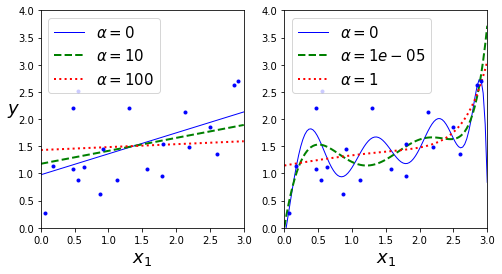

In [57]:
# 경사하강법을 활용, 여러 alpha조건 하에서 훈련시켜보기
def plot_model(model_class, polynomial, alphas, **model_kargs): # kargs? alpha=>0이면 함수 사용자가 쓰고싶은 모델을 입력받아 쓰겠다.(default는 조건문에서 선형회귀로 설정됨)
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.savefig("ridge_regression_plot")
plt.show()

In [58]:
#확률적 경사하강법 활용
sgd_reg = SGDRegressor(penalty="l2") # penalty=l2는 theta의 2차노름제곱을 2로나눈 규제항추가 (즉 릿지회귀와 같다)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.46543286])

2. 라쏘 회귀 (릿지회귀와 원리동일. 단, theta대한 2차노름대신 1차노름사용 (2로안나누고))

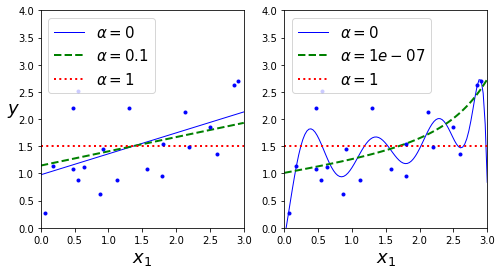

In [59]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)

plt.savefig("lasso_regression_plot")
plt.show()

In [60]:
#간단한 라소회귀 적용
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

3, 엘라스틱넷 (릿지와 라쏘 절충. 두개의 절충모델)
그냥 MSE(theta)에 각각의 규제항만 더하고. 혼합비율을 곱해준 절충식임.

In [61]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio = 0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])

# ※참고(교재 릿지회귀 vs 라쏘회귀 플롯 - 코드 어려움)

In [77]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

# 편향은 무시
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

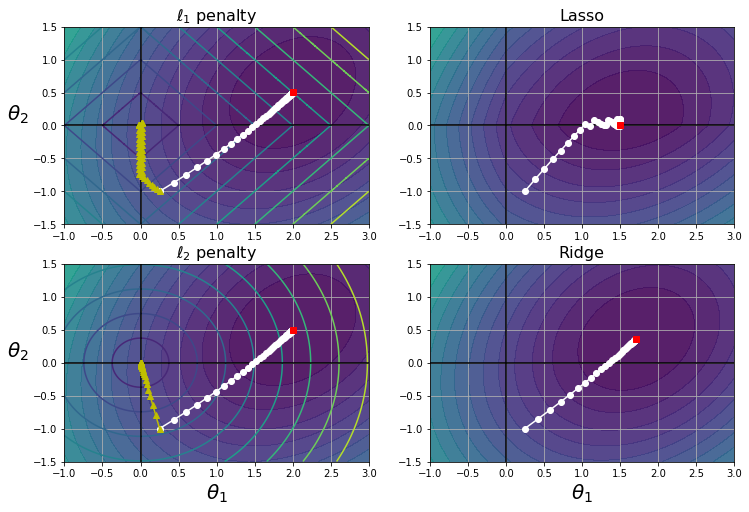

In [78]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta

        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

plt.figure(figsize=(12, 8))
for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso"), (1, N2, 0,  0.1, "Ridge")):
    JR = J + l1 * N1 + l2 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    plt.subplot(221 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9)
    plt.contour(t1, t2, N, levels=levelsN)
    plt.plot(path_J[:, 0], path_J[:, 1], "w-o")
    plt.plot(path_N[:, 0], path_N[:, 1], "y-^")
    plt.plot(t1_min, t2_min, "rs")
    plt.title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0, labelpad=15)
    if i == 1: plt.xlabel(r"$\theta_1$", fontsize=20)

    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    plt.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    plt.plot(t1r_min, t2r_min, "rs")
    plt.title(title, fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1: plt.xlabel(r"$\theta_1$", fontsize=20)

plt.savefig("lasso_vs_ridge_plot")
plt.show()

4. 훌륭한 공짜 점심(조기종료)
-> 검증에러가 최솟값에 도달하면 바로 훈련 중지

-> 과대적합되면, 훈련err는 주는데 검증err가 늘기 시작하므로 아예 검증err가 최소인 지점에서 멈추겠다! 는 idea


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linea

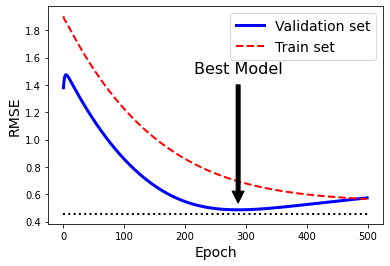

In [62]:
from sklearn.base import clone

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True, # warm_start? fit()호출시 이전 모델파라미터에서 훈련 그대로함.(뜨끈할때 그대로 시작한다는 느낌)
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best Model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Train set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.savefig("early_stopping_plot")
plt.show()

# 4.6 로지스틱 회귀
입력특성 가중치합 + 편향 -> 추정확률을 계산한다(특정클래스에 속할 확률)

※분류문제로도 가능. 속할확률50%이상 -> 1 아니면 0


In [43]:
# 선형회귀처럼 바로 결과(수치)를 출력X 로지스틱(속할확률)을 출력함.


In [44]:
# 훈련방식? 양성(y=1)에 높은확률 음성(y=0)에 낮은확률 추정해줄수 있는 모델 파라미터벡터 Theta를 찾는 것!

In [63]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
X = iris['data'][:,3:] # 꽃잎의 너비(petal width(cm))
y = (iris['target']==2).astype(np.int) # Iris가 Virginica면 1 아니면 0

In [64]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

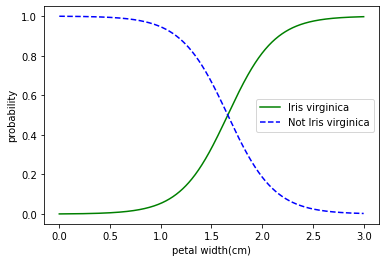

In [65]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g-", label = "Iris virginica")
plt.plot(X_new, y_proba[:,0], "b--", label = "Not Iris virginica")
plt.xlabel('petal width(cm)')
plt.ylabel('probability')
plt.legend() # 현재 1.6을 기점(결정경계)로 그림이 그려졌다. 꽃잎너비가 1.6보다 크면 1(버지니카)로 판단.

In [67]:
log_reg.predict([[1.7],[1.5]]) # 1.7은 1로 1.5는 0으로 예측하고있음

array([1, 0])

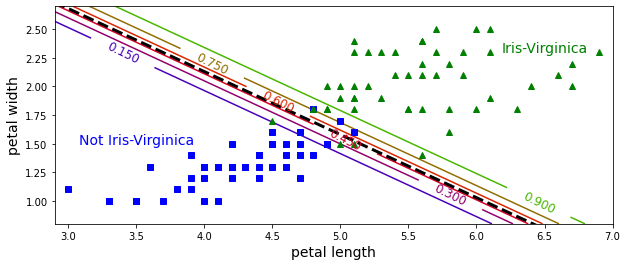

In [68]:
#선형 결정 경계
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver='liblinear', C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.savefig("logistic_regression_contour_plot")
plt.show()

소프트맥스 회귀(=다항 로지스틱 회귀)

(이전 3장 Mnist처럼, 다중클래스(0~9분류처럼)분류하는 경우, 이진 분류기 연결시키지않고, 로지스틱모델 스스로 다중 클래스 지원.

https://wikidocs.net/59427 사이트 참고

>> m차원 벡터(샘플Data,입력Data)를 받아 분류하고 싶은 차원수(k개, iris의경우 품종k=3)의 벡터로 변형. 그걸 Z라하자. 이 Z는 입력벡터의 여러 값들에 대하여 k갱 클래스에 속할 점수 Sk(x)를 계산한 점수벡터다.

이 z를 소프트맥스 함수에 넣어서(=정규화된 지수 함수) 각 클래스 확률을 추정하는 원리다.

ex) (0.2 , 0.5, 0.3) 이렇게 k분류별로 속할 확률을 구한다. (k1,k2,k3)에속할 확률

In [69]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 넓이
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

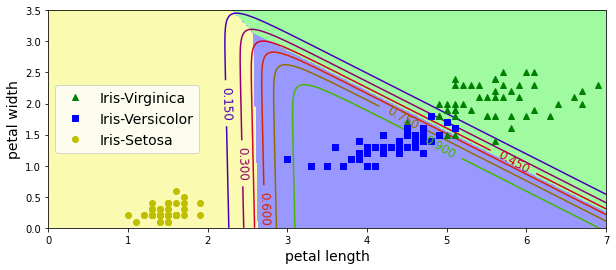

In [72]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.savefig("softmax_regression_contour_plot")
plt.show()

In [75]:
print(softmax_reg.predict([[5,2]])) #마지막 값에 속할 확률이 젤 높게 나왔다.
softmax_reg.predict_proba([[5,2]])

[2]


array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

# 여러 함수 정리

★PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
위는 Default. degree는 바꾸고싶은 차원수(다항변수로 변환해줌)
**interaction_only?** a^2, b^2이런걸 빼겠단는 옵션임. 만약 True라면 항 하나만 가진 예를들어,[[2],[4]]말고 [2]이런 단항에 대해서 한다면 결과로 [2]만반환. False면
[2 , 2^2] 이렇게 두개의 열로 어레이 만들어서 반환.

**include_bias?** 맨 앞에 항없는 0차항값도 추가해주는거 (즉 1로만 된 열도 추가)

random 3총사

np.random.randint 균일분포의 정수 난수 1개 생성
ex)randint(1,5) 1~4까지 랜덤숫자 1개
randint(3) 0 or 1 or 2 랜덤숫자 1개

np.random.rand 0부터 1사이 균일분포에서 난수 matrix array생성
ex)rand(m,n) m x n매트릭스 생성(0,1사이숫자로만)

np.random.randn 가우시안 표준정규분포(G)에서 난수 matrix array생성
ex)randn(m,n) 평균0 표준편차1인 난수를 m x n매트릭스로 생성

linspace(x1,x2)는 x1과 x2 사이에서 균일한 간격의 점 100개로 구성된 행 벡터를 반환.
ex) y= linspace(-5,5) // y
-5.0000   -3.3333   -1.6667         0    1.6667    3.3333    5.0000
https://kr.mathworks.com/help/matlab/ref/linspace.html
